In [13]:
from xfoil import XFoil
from xfoil.model import Airfoil
from config import *
from lib.utils import *
from lib.preprocess_modules import *
from pathlib import Path
import os
import numpy as np
import matplotlib.pyplot as plt

In [24]:
s = []
for fname in os.listdir(foils_dat_path):
    try:
        x, y = read_airfoil_dat_file(Path(foils_dat_path, fname))
        current_foil = Airfoil(x,y)
        S = round(get_foil_root_thickness(current_foil)*100,0)
        if S<25: s.append(S)        
    except Exception as ex:
        print (fname, str(ex))
s = np.array(s)
x_s, y_s = np.unique(s, return_counts=True)

goe187.dat 'charmap' codec can't decode byte 0x81 in position 12: character maps to <undefined>
goe188.dat 'charmap' codec can't decode byte 0x81 in position 12: character maps to <undefined>
goe235.dat 'charmap' codec can't decode byte 0x81 in position 12: character maps to <undefined>
n642415.dat Foil_root_thickness is over 1!
naca1.dat Foil_root_thickness is over 1!
W: File 'Foils DB\dat\naca23015.dat': can't read and convert X=1.0000 and Y=......, this coordinate skipped.
W: File 'Foils DB\dat\naca23015.dat': can't read and convert X=0.0000 and Y=......, this coordinate skipped.
W: File 'Foils DB\dat\naca23018.dat': can't read and convert X=1.0000 and Y=......, this coordinate skipped.
W: File 'Foils DB\dat\naca23018.dat': can't read and convert X=0.0000 and Y=......, this coordinate skipped.
W: File 'Foils DB\dat\naca23021.dat': can't read and convert X=1.0000 and Y=......, this coordinate skipped.
W: File 'Foils DB\dat\naca23021.dat': can't read and convert X=0.0000 and Y=......,

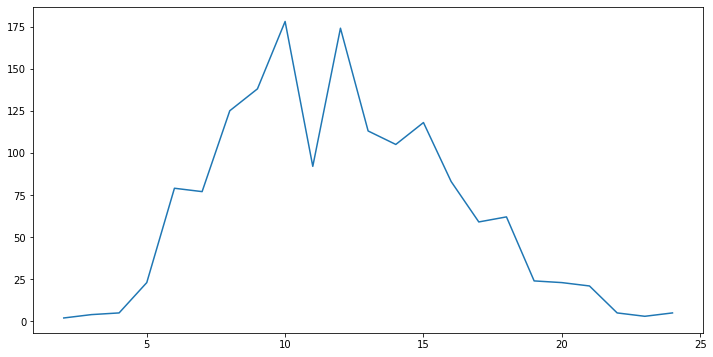

In [29]:
plt.figure(figsize=(12,6))
plt.plot(x_s, y_s);
plt.axes()

In [44]:
for smin in range(3, 7):
    for smax in range(10,18):
        print("Всего профилей в диапазоне толщин от %i до %i процентов: %s штук." % (smin, smax, s[((s>=smin) & (s<=smax))].shape[0]))

Всего профилей в диапазоне толщин от 3 до 10 процентов: 629 штук.
Всего профилей в диапазоне толщин от 3 до 11 процентов: 721 штук.
Всего профилей в диапазоне толщин от 3 до 12 процентов: 895 штук.
Всего профилей в диапазоне толщин от 3 до 13 процентов: 1008 штук.
Всего профилей в диапазоне толщин от 3 до 14 процентов: 1113 штук.
Всего профилей в диапазоне толщин от 3 до 15 процентов: 1231 штук.
Всего профилей в диапазоне толщин от 3 до 16 процентов: 1314 штук.
Всего профилей в диапазоне толщин от 3 до 17 процентов: 1373 штук.
Всего профилей в диапазоне толщин от 4 до 10 процентов: 625 штук.
Всего профилей в диапазоне толщин от 4 до 11 процентов: 717 штук.
Всего профилей в диапазоне толщин от 4 до 12 процентов: 891 штук.
Всего профилей в диапазоне толщин от 4 до 13 процентов: 1004 штук.
Всего профилей в диапазоне толщин от 4 до 14 процентов: 1109 штук.
Всего профилей в диапазоне толщин от 4 до 15 процентов: 1227 штук.
Всего профилей в диапазоне толщин от 4 до 16 процентов: 1310 штук.
В

In [55]:
# Димыч выбрал диапазон от 4 до 10
smin = 4
smax = 10

In [56]:
used_foils = []
for fname in os.listdir(foils_dat_path):
    try:
        x, y = read_airfoil_dat_file(Path(foils_dat_path, fname))
        current_foil = Airfoil(x,y)
        S = round(get_foil_root_thickness(current_foil)*100,0)
        if S>=4 and S<=10: used_foils.append(fname)        
    except Exception as ex:
        print (fname, str(ex))

goe187.dat 'charmap' codec can't decode byte 0x81 in position 12: character maps to <undefined>
goe188.dat 'charmap' codec can't decode byte 0x81 in position 12: character maps to <undefined>
goe235.dat 'charmap' codec can't decode byte 0x81 in position 12: character maps to <undefined>
n642415.dat Foil_root_thickness is over 1!
naca1.dat Foil_root_thickness is over 1!
W: File 'Foils DB\dat\naca23015.dat': can't read and convert X=1.0000 and Y=......, this coordinate skipped.
W: File 'Foils DB\dat\naca23015.dat': can't read and convert X=0.0000 and Y=......, this coordinate skipped.
W: File 'Foils DB\dat\naca23018.dat': can't read and convert X=1.0000 and Y=......, this coordinate skipped.
W: File 'Foils DB\dat\naca23018.dat': can't read and convert X=0.0000 and Y=......, this coordinate skipped.
W: File 'Foils DB\dat\naca23021.dat': can't read and convert X=1.0000 and Y=......, this coordinate skipped.
W: File 'Foils DB\dat\naca23021.dat': can't read and convert X=0.0000 and Y=......,

In [57]:
len(used_foils)

625

In [60]:
sname = 'Foils '+str(smin)+'-'+str(smax)+' thickness.pkl'
save_pkl(used_foils, Path(foils_dat_path, sname))
sname

'Foils 4-10 thickness.pkl'